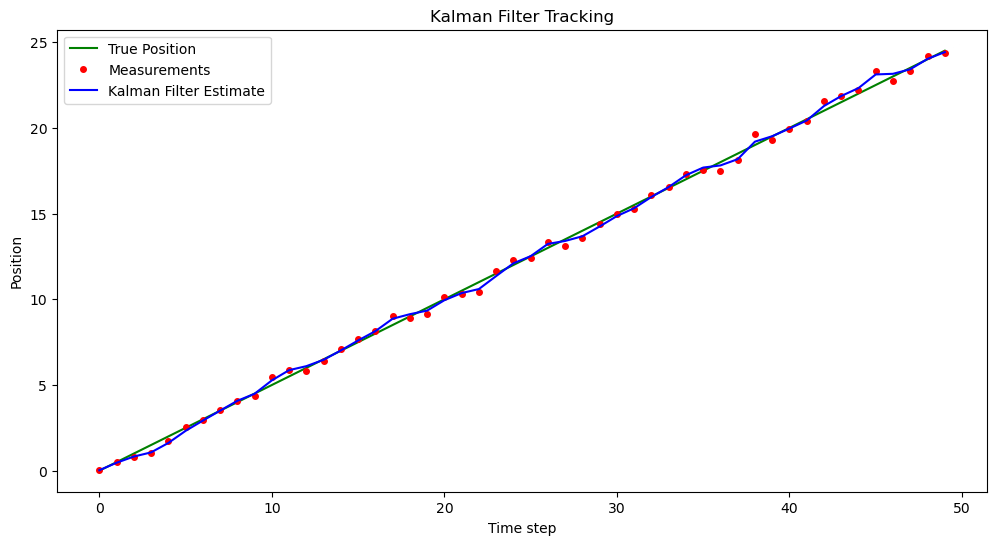

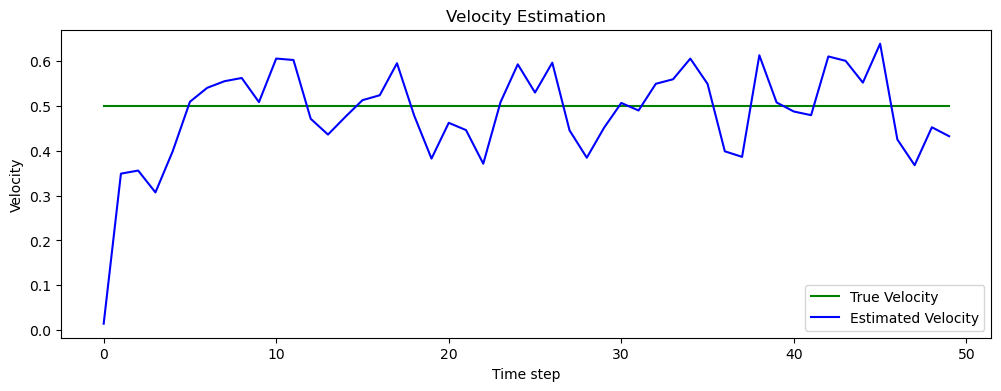

In [1]:
import numpy as np
import matplotlib.pyplot as plt

class KalmanFilter:
    def __init__(self, initial_state, initial_uncertainty, process_variance, measurement_variance):
        """
        Initialize the Kalman Filter.
        
        Parameters:
        - initial_state: Initial state estimate [position, velocity]
        - initial_uncertainty: Initial covariance matrix
        - process_variance: Variance in the process (how much we expect the object to move)
        - measurement_variance: Variance in the measurement (how accurate our sensor is)
        """
        self.state = initial_state  # [position, velocity]
        self.covariance = initial_uncertainty  # Initial uncertainty
        self.process_noise = np.array([[process_variance, 0], 
                                      [0, process_variance]])  # Process noise
        self.measurement_noise = measurement_variance  # Measurement noise
        
        # State transition matrix (assuming constant velocity model)
        self.transition_matrix = np.array([[1, 1], 
                                         [0, 1]])
        
        # Measurement matrix (we only observe position)
        self.measurement_matrix = np.array([[1, 0]])
    
    def predict(self):
        """Predict the next state"""
        # Predict state
        self.state = np.dot(self.transition_matrix, self.state)
        # Predict covariance
        self.covariance = np.dot(np.dot(self.transition_matrix, self.covariance), 
                               self.transition_matrix.T) + self.process_noise
        return self.state
    
    def update(self, measurement):
        """Update the state estimate with a new measurement"""
        # Calculate Kalman Gain
        S = np.dot(self.measurement_matrix, np.dot(self.covariance, self.measurement_matrix.T)) + self.measurement_noise
        K = np.dot(np.dot(self.covariance, self.measurement_matrix.T), np.linalg.inv(S))
        
        # Update state with measurement
        y = measurement - np.dot(self.measurement_matrix, self.state)
        self.state = self.state + np.dot(K, y)
        
        # Update covariance
        I = np.eye(self.state.shape[0])
        self.covariance = np.dot(I - np.dot(K, self.measurement_matrix), self.covariance)
        
        return self.state

# Simulation parameters
num_steps = 50
true_velocity = 0.5
process_var = 0.01
measurement_var = 0.1

# Generate true position and noisy measurements
true_positions = np.array([i * true_velocity for i in range(num_steps)])
measurements = true_positions + np.random.normal(0, np.sqrt(measurement_var), num_steps)

# Initialize Kalman Filter
initial_state = np.array([0, 0])  # Start at position 0 with velocity 0
initial_uncertainty = np.eye(2)  # High initial uncertainty
kf = KalmanFilter(initial_state, initial_uncertainty, process_var, measurement_var)

# Run the filter
estimated_positions = []
estimated_velocities = []

for measurement in measurements:
    # Predict
    predicted_state = kf.predict()
    
    # Update
    updated_state = kf.update(measurement)
    
    estimated_positions.append(updated_state[0])
    estimated_velocities.append(updated_state[1])

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(true_positions, 'g-', label='True Position')
plt.plot(measurements, 'ro', label='Measurements', markersize=4)
plt.plot(estimated_positions, 'b-', label='Kalman Filter Estimate')
plt.title('Kalman Filter Tracking')
plt.xlabel('Time step')
plt.ylabel('Position')
plt.legend()
plt.show()

# Plot velocity estimate
plt.figure(figsize=(12, 4))
plt.plot([true_velocity] * num_steps, 'g-', label='True Velocity')
plt.plot(estimated_velocities, 'b-', label='Estimated Velocity')
plt.title('Velocity Estimation')
plt.xlabel('Time step')
plt.ylabel('Velocity')
plt.legend()
plt.show()